In [1]:
from nilearn import image
from nilearn import plotting
from nilearn import surface
from nilearn import datasets
from nilearn.datasets import MNI152_FILE_PATH
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.patches as mpatches
import numpy as np

AttributeError: 'LZRProjector' object has no attribute 'legend'

<Figure size 432x288 with 0 Axes>

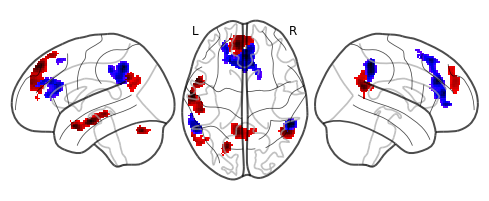

In [9]:
#path = "ST_SurprisalParam_16.12\\flexibleFactorial\\beta_0001.nii"
entropy_main = "ST_EntropyParam_16.12\\flexibleFactorial\\NegEntropy_both_p001_k89.nii"
surprisal_main = "ST_SurprisalParam_16.12\\flexibleFactorial\\surprisal_both_p001k89.nii"
#path = 'ST_SurprisalParam_16.12\\flexibleFactorial\\spmT_0003.nii'
#path = 'SurprisalParam_24.10\\2ndLvl\\Surprisal\\spmT_0001.nii' # old prepro

# artist proxies for legend
red_patch = mpatches.Patch(color='red', label='Surprisal Increase')
blue_patch = mpatches.Patch(color='blue', label='Entropy Decrease')

#img = plt.imread(path)
#plotting.plot_stat_map(entropy_main)
display = plt.figure() 
display = plotting.plot_glass_brain(surprisal_main, display_mode = 'lzr')#, colorbar = True) 
display.add_overlay(entropy_main, cmap= plotting.cm.black_purple_r, vmin = 2)#, colorbar = True) #vmin is really important to make the colors work properly
#display.plotting.plot_glass_brain(entropy_main, display_mode = 'lzry',cmap= plotting.cm.black_purple)

display.legend([red_patch, blue_patch],['Surprisal Increase', 'Entropy Decrease'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
display.savefig("Figure2_full_highres.png", dpi = 200)

#dis = plotting.plot_glass_brain(surprisal_main) #, threshold=3, colorbar = True,)# display_mode = 'lzry')
#dis.add_overlay(entropy_main, cmap= plotting.cm.black_blue_r, vmin = 0) #different vmin values make the colors brighter/darker

# artist proxies for legend
#red_patch = mpatches.Patch(color='red', label='Surprisal Increase')
#blue_patch = mpatches.Patch(color='blue', label='Entropy Decrease')

#plt.legend([red_patch, blue_patch],['Surprisal Increase', 'Entropy Decrease'], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

## Figure 2

Glass brain representation of activations associated with increase in suprisal (red) or decrease in next-word entropy (p = 0.001). Color indicates activation strength (T-values).

In [ ]:
# finding out threshold of entropy_dec_NK_K
import nibabel as nib

def find_threshold(imagepath):
    """
    This function takes a path to a Nifti image,
    loads it, and gives you the smallest value.
    Useful for identifying the threshold you used 
    as a T-value im thresholded SPMs
    """
    
    img = nib.load(imagepath) # load Nifti
    dat = np.array(img.get_fdata()) # load image into numpy array
    dat = dat[~np.isnan(dat)] # remove all nan
    return np.min(dat) # this is the threshold, in T-values

#print(find_threshold(entropy_dec_NK_K))
